In [13]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container {width:100% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: roicat


In [14]:
from pathlib import Path
import copy
import functools
import gc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import natsort
import sklearn
import torch


In [15]:
%load_ext autoreload
%autoreload 2
import bnpm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
paths_elt = bnpm.path_helpers.find_paths(
    dir_outer=r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/',
    reMatch='idx_eye_laser\.pkl',
    depth=8,
    natsorted=True,
)

In [17]:
paths_elt

['/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230430/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230501/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230502/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230503/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230504/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230505/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230506/jobNum_0/idx_eye_laser.pkl',
 '/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230507/jobNum_0/idx_eye_laser.pkl',
 '/media

In [18]:
elts = {Path(p).parts[-3]: bnpm.file_helpers.pickle_load(p) for p in paths_elt}

In [19]:
elts2 = copy.deepcopy(elts)

In [20]:
%matplotlib widget

20230430 60.04388888888889
20230501 60.0325
20230502 60.04375
20230503 60.03527777777778
20230504 60.04736111111111
20230505 60.033611111111114
20230506 60.01944444444444
20230507 60.02986111111111
20230508 60.02736111111111
20230509 60.03097222222222
20230510 60.03819444444444
20230511 60.03125


/tmp/ipykernel_56865/3209048184.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


20230512 60.04305555555556
20230514 60.040277777777774
20230515 60.02930555555555
20230516 60.04194444444445
20230517 60.042500000000004
20230518 60.04972222222222
20230519 60.044583333333335
20230520 60.040277777777774
20230521 60.03958333333333
20230522 60.042361111111106
20230523 60.04041666666667
20230525 60.04125
20230526 60.043194444444445
20230527 60.038472222222225
20230528 60.02986111111111
20230529 60.029583333333335
20230530 60.038333333333334
20230531 60.03944444444445
20230601 60.03


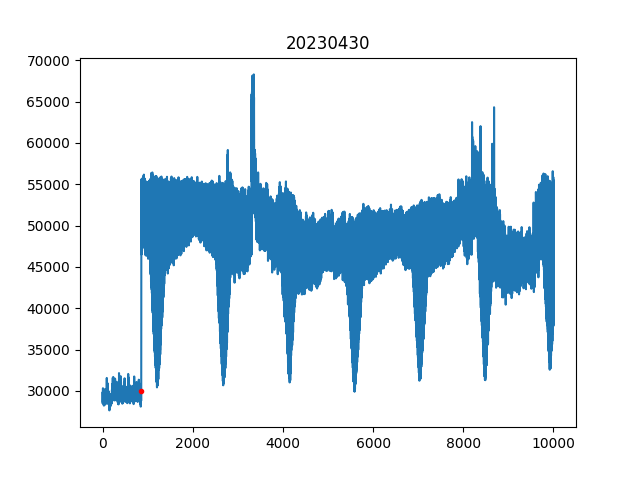

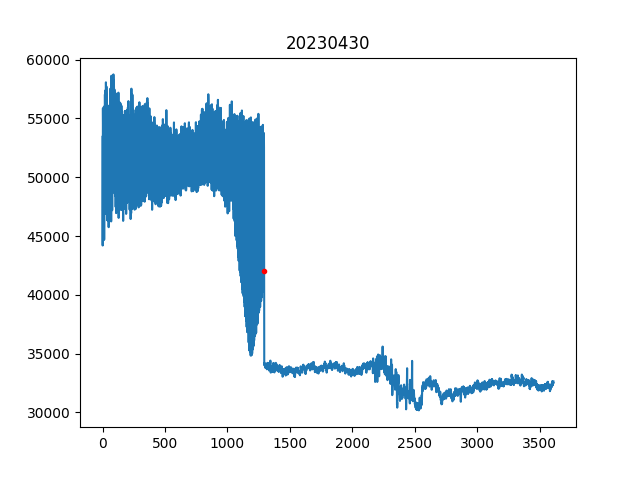

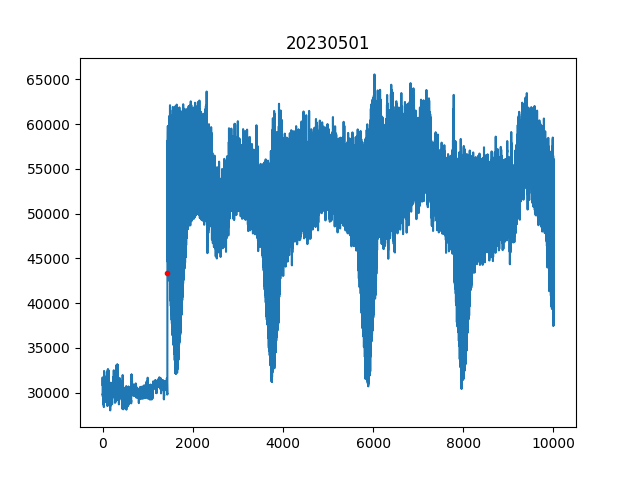

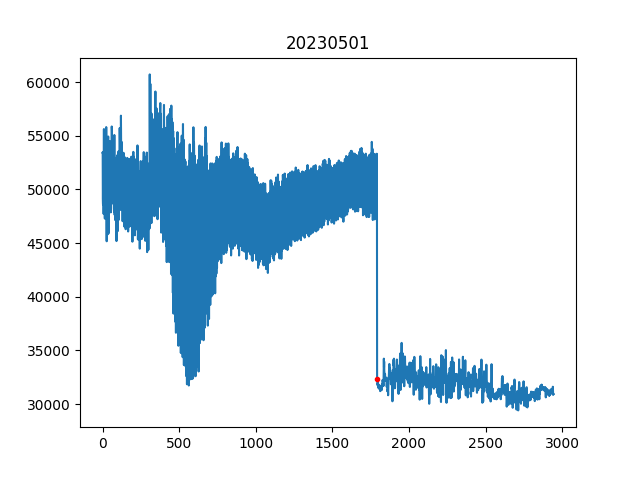

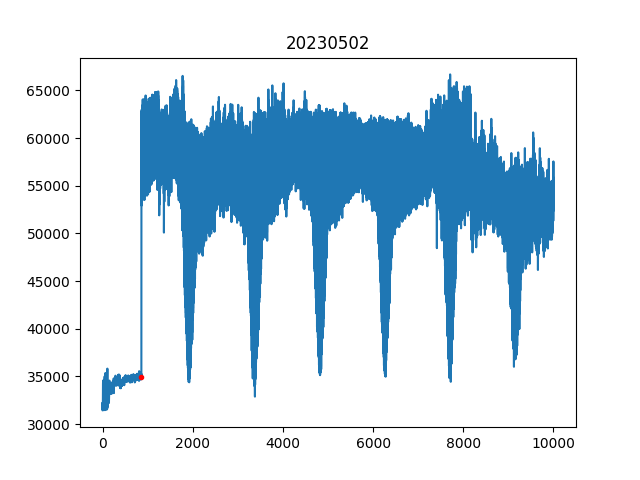

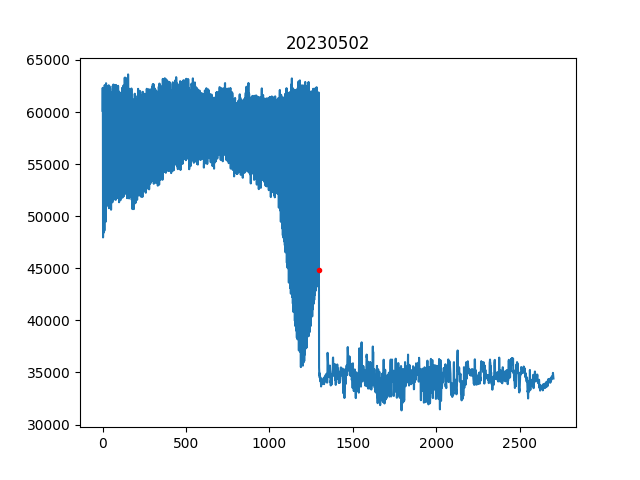

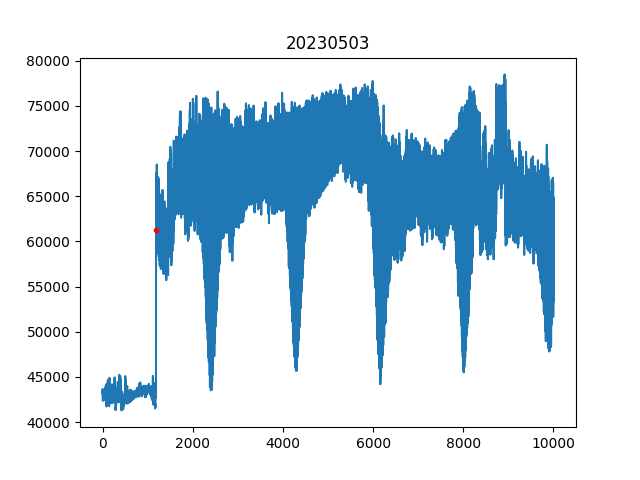

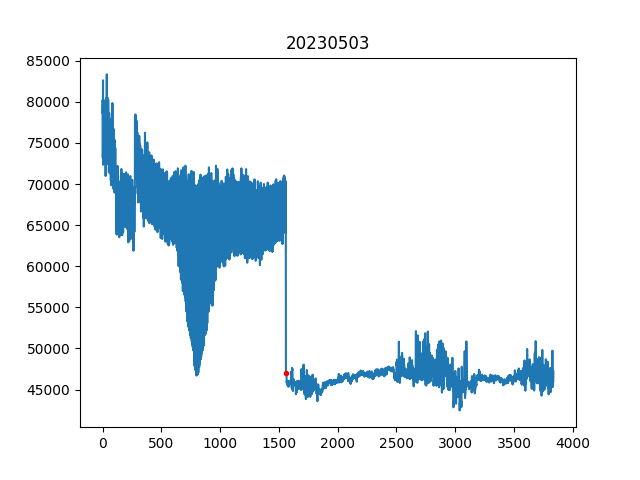

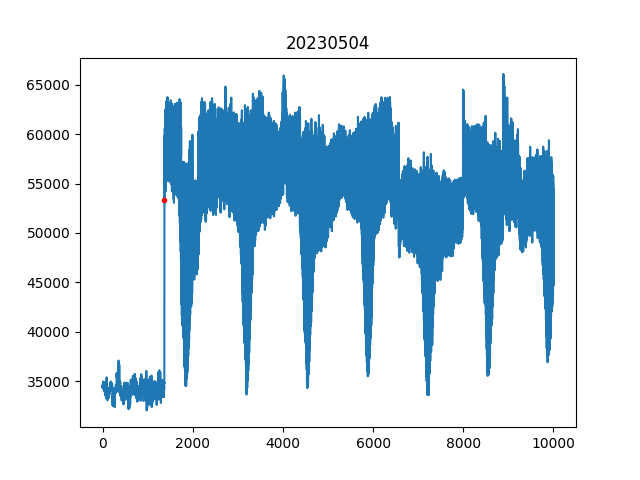

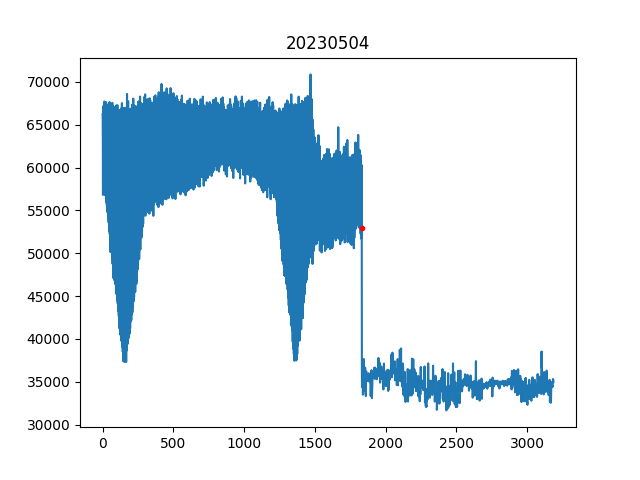

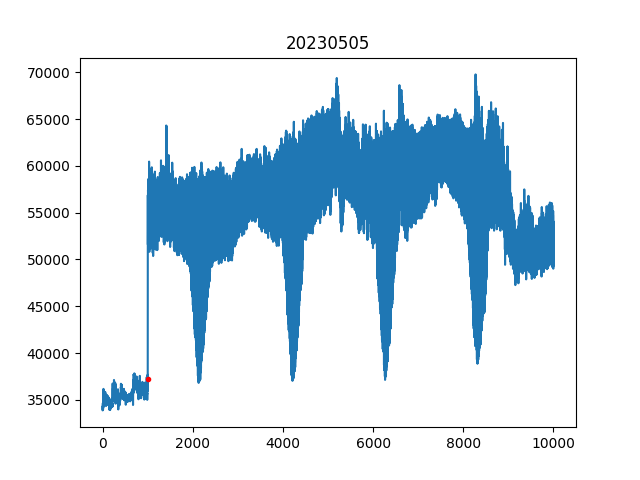

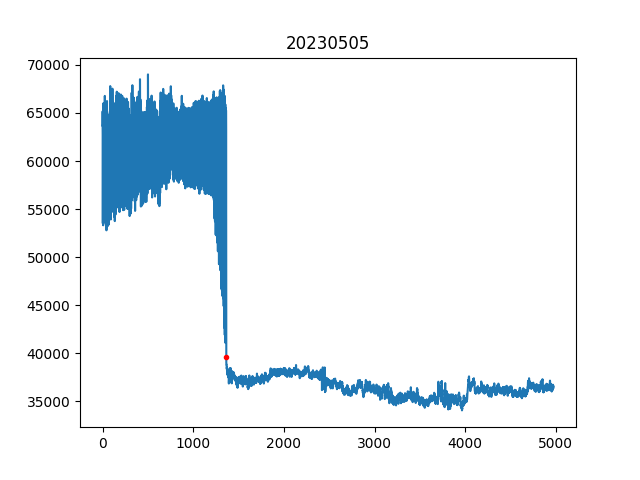

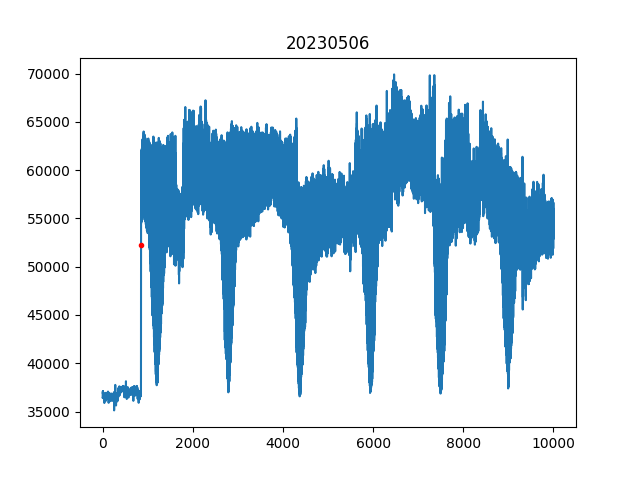

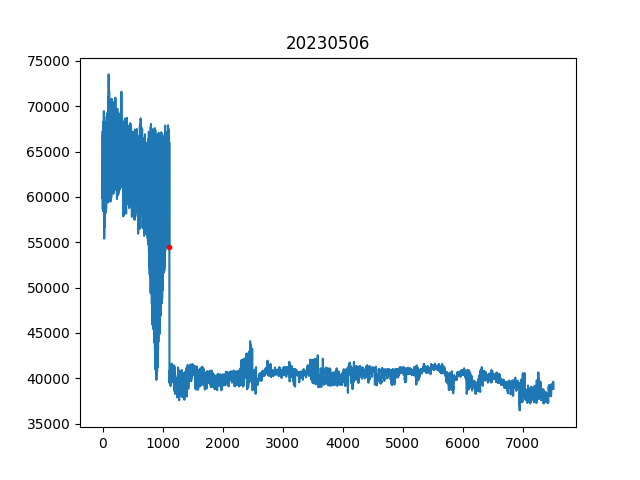

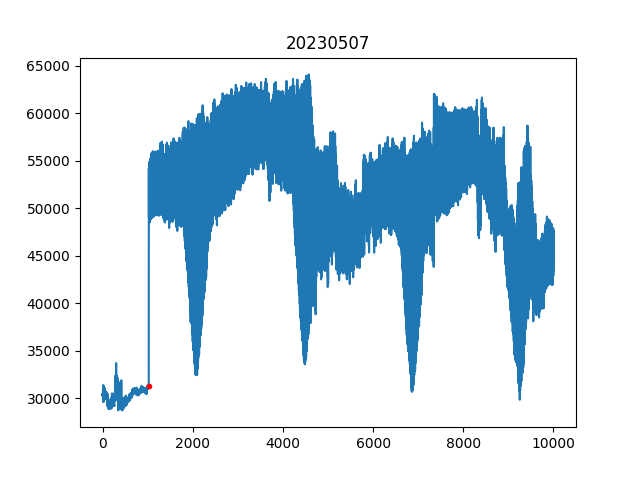

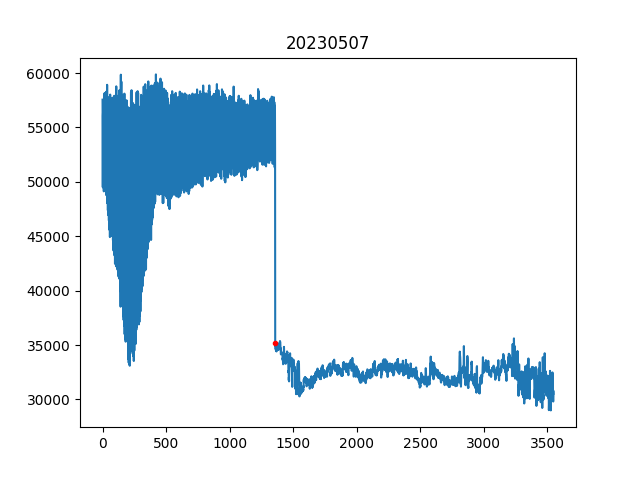

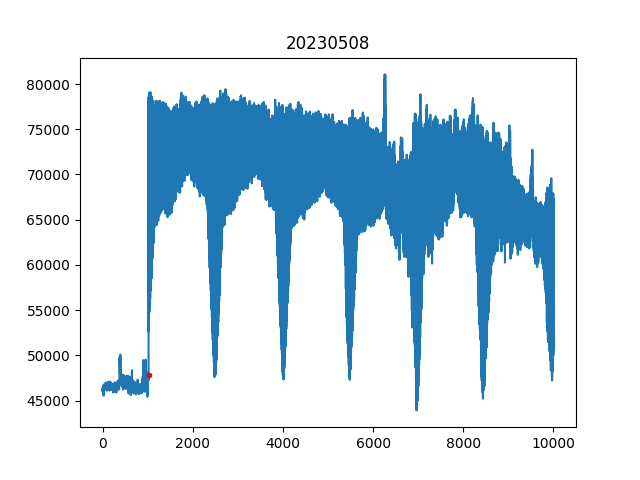

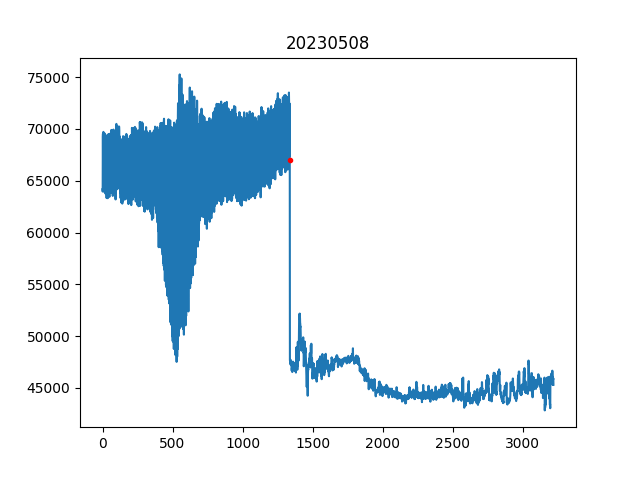

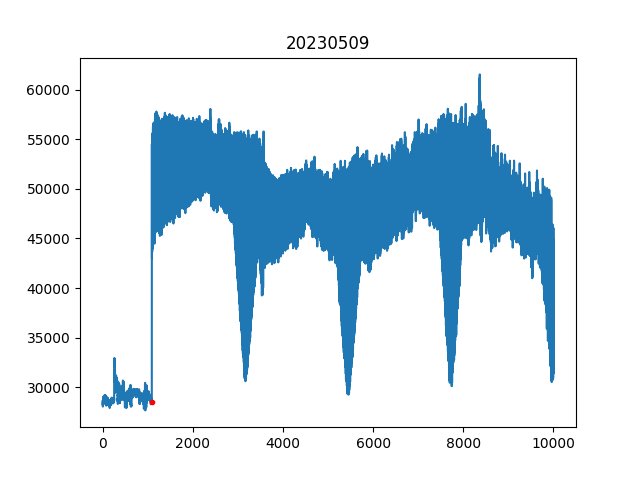

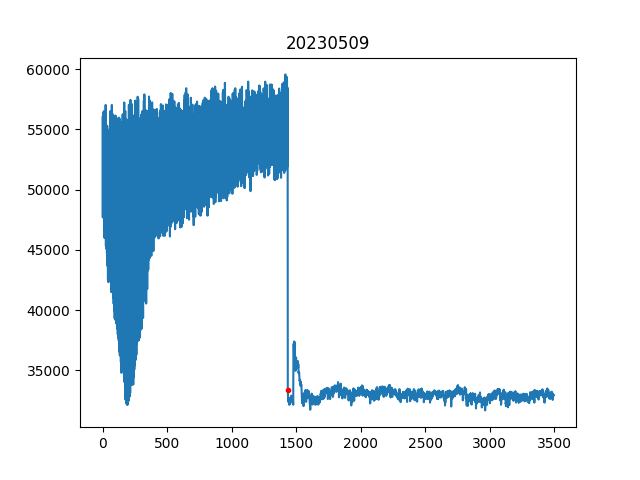

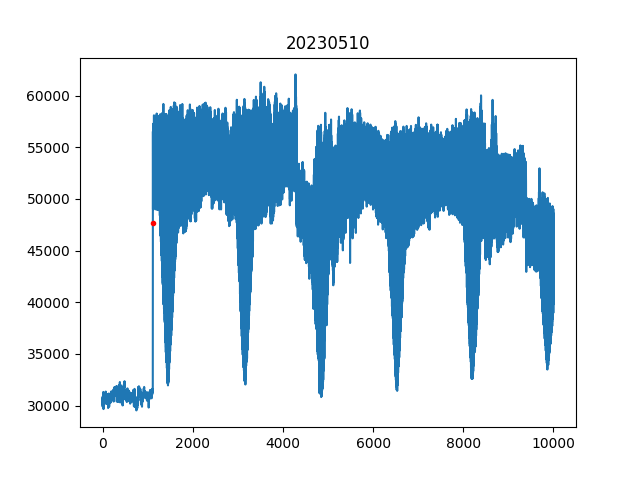

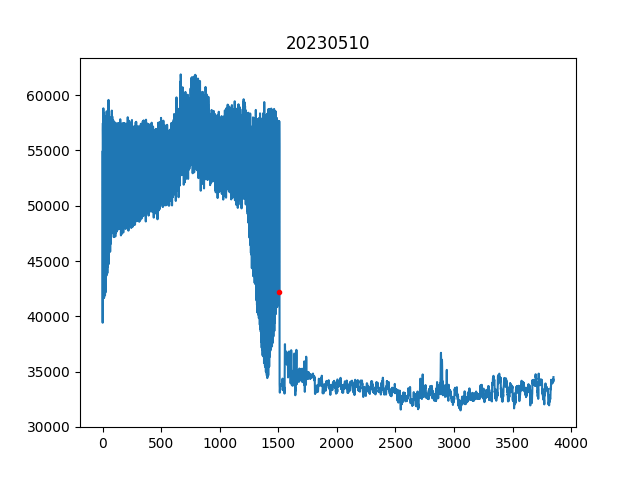

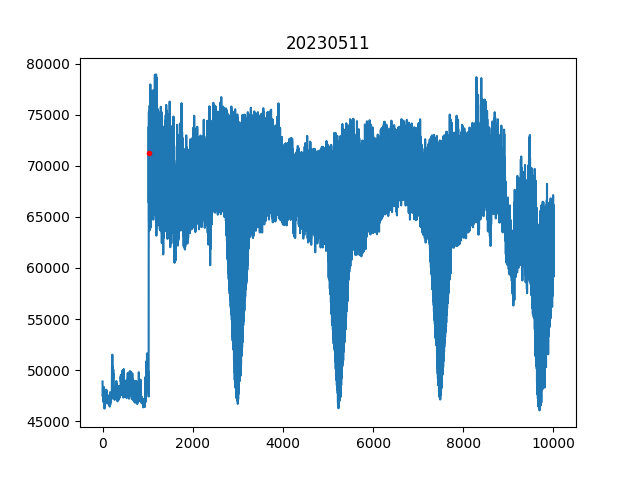

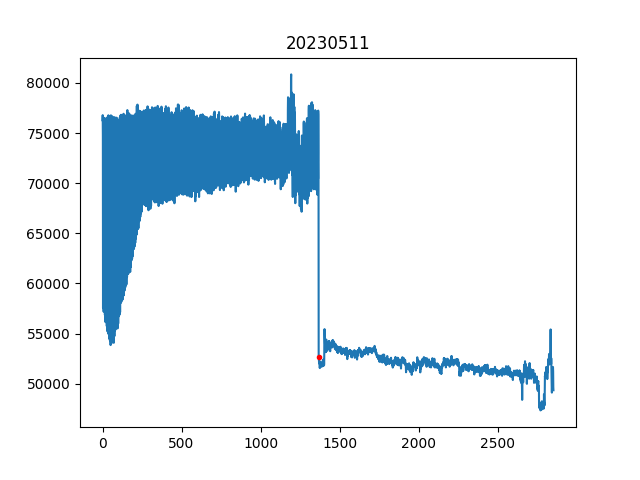

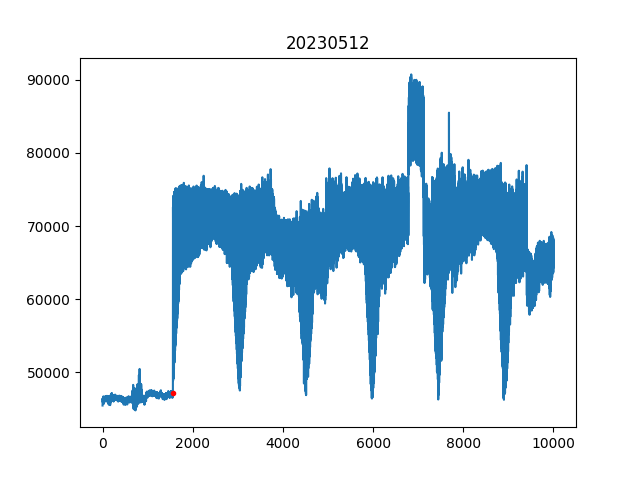

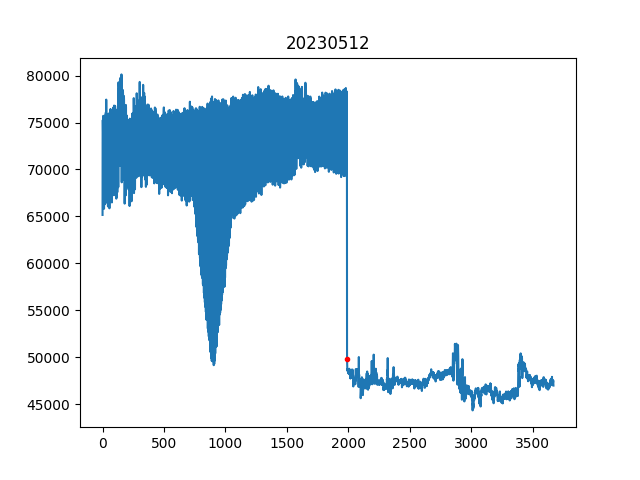

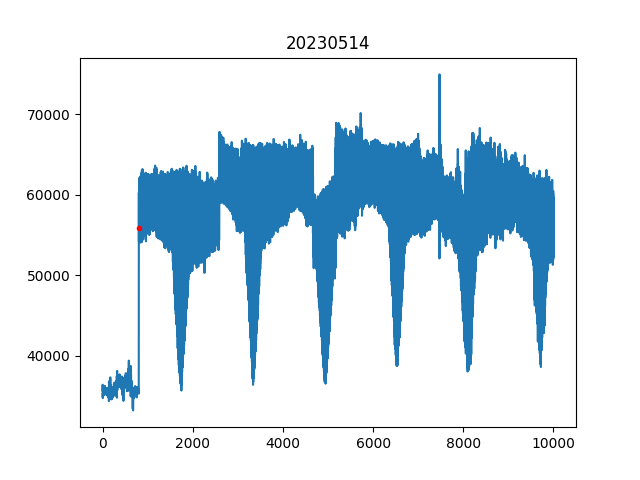

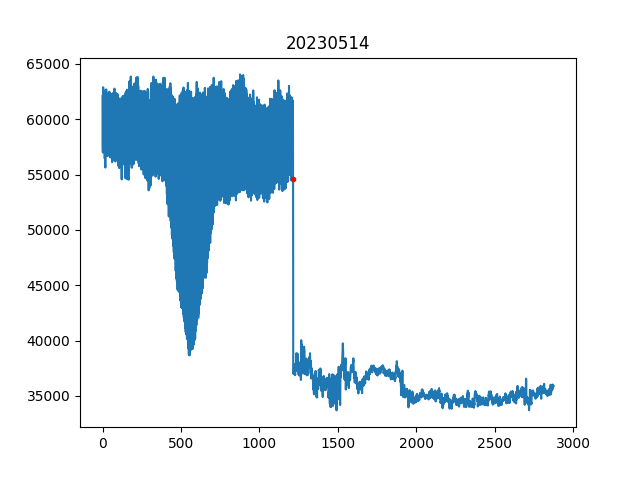

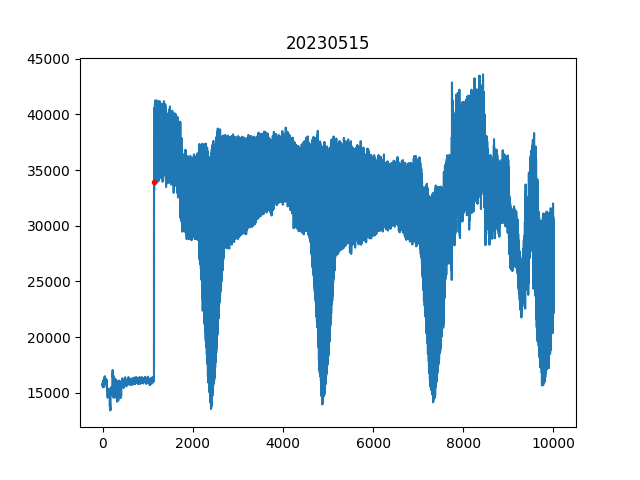

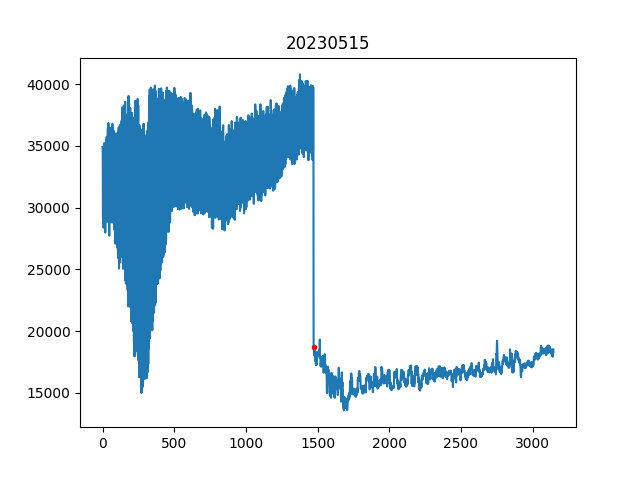

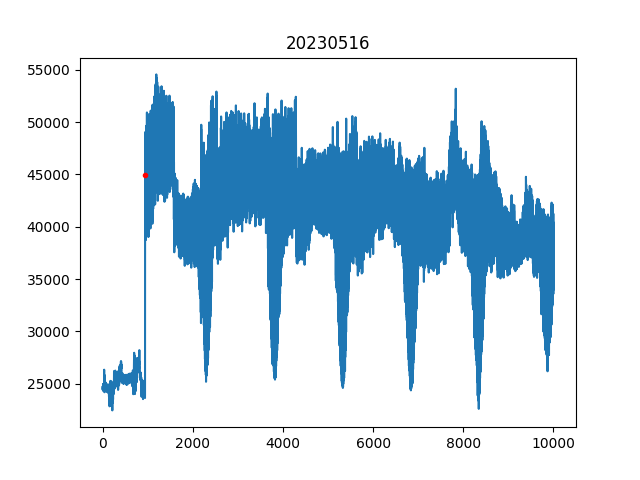

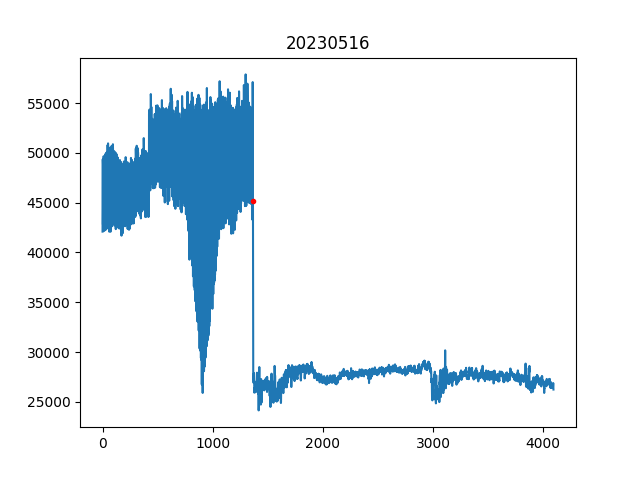

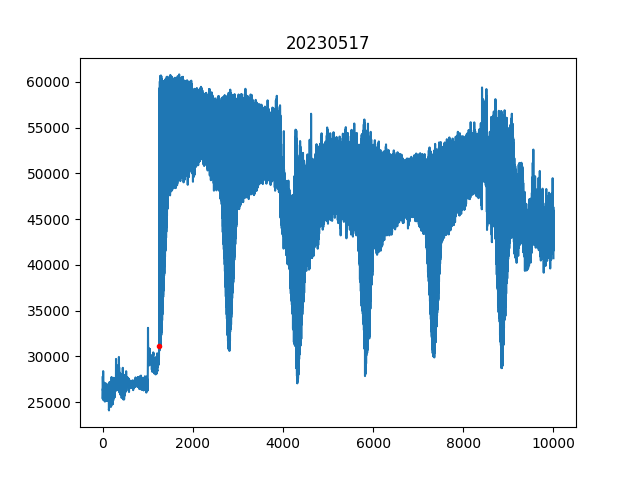

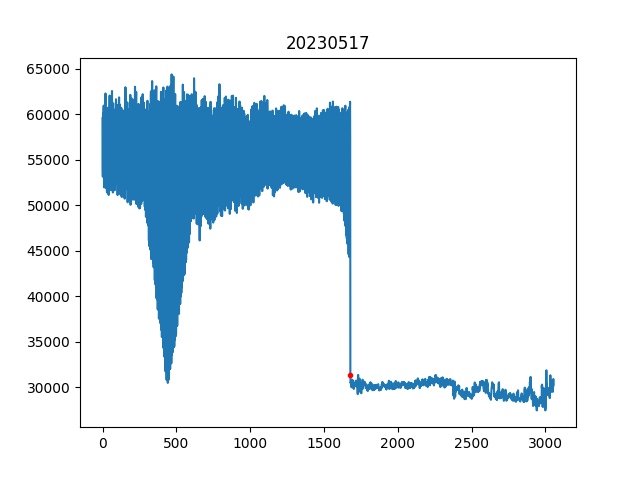

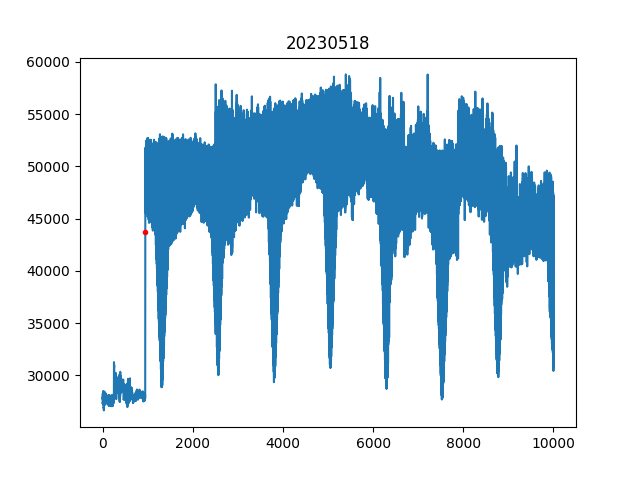

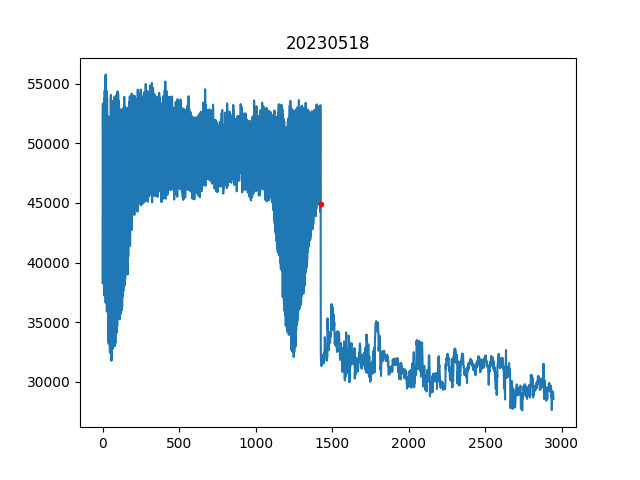

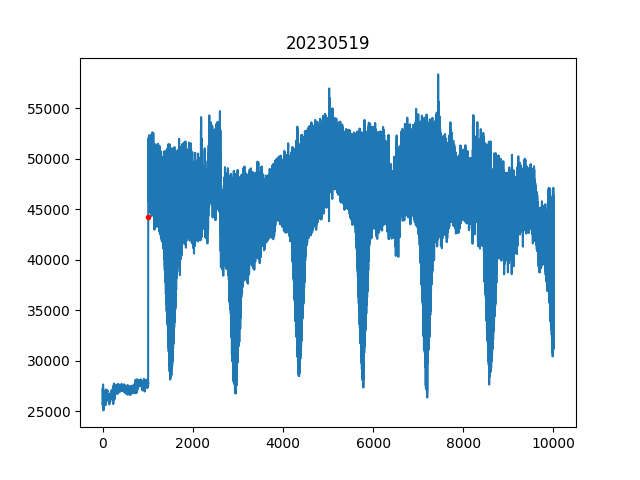

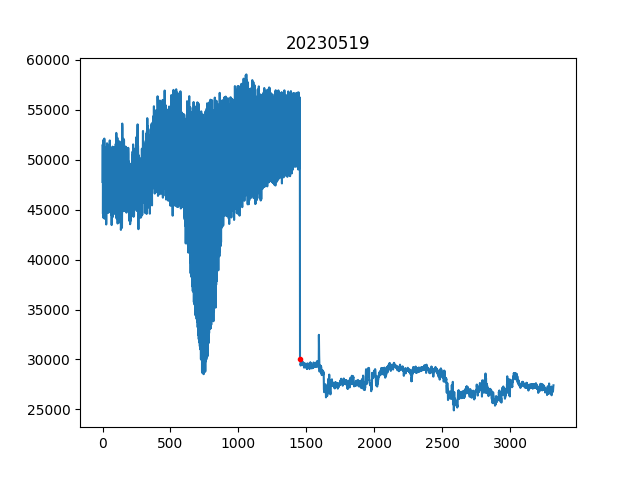

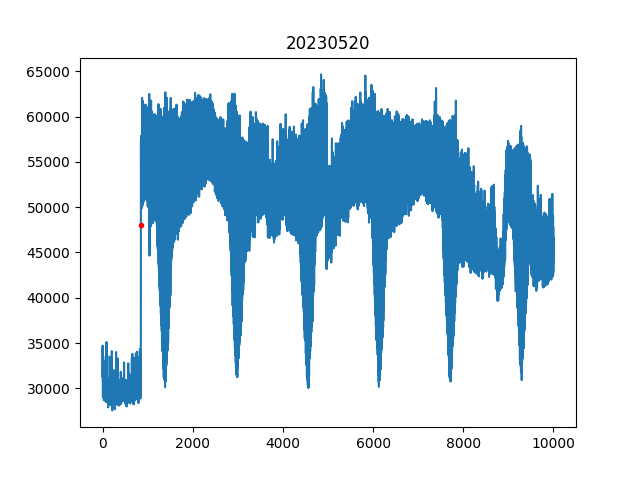

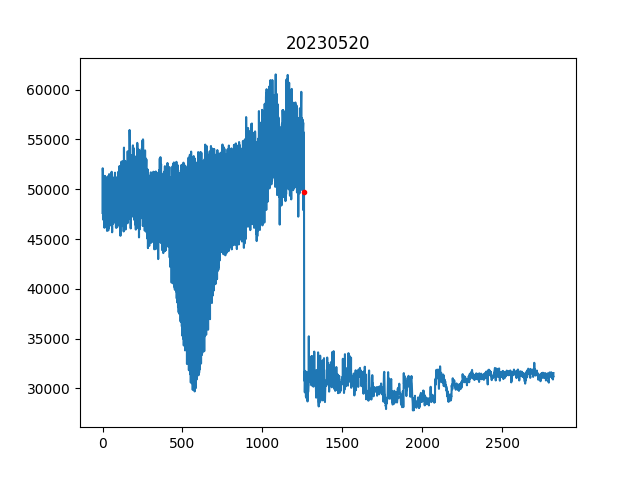

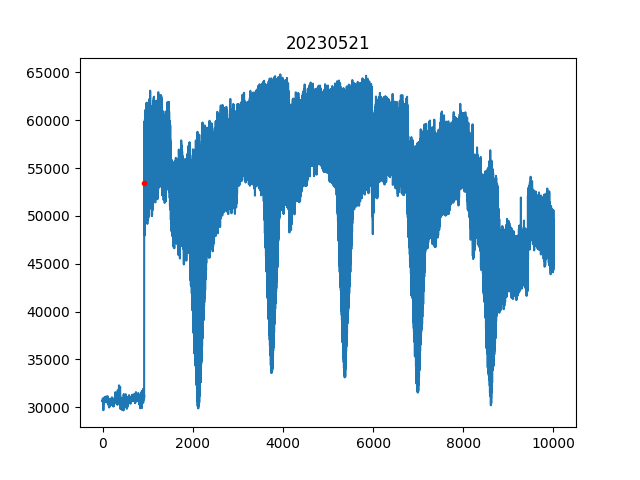

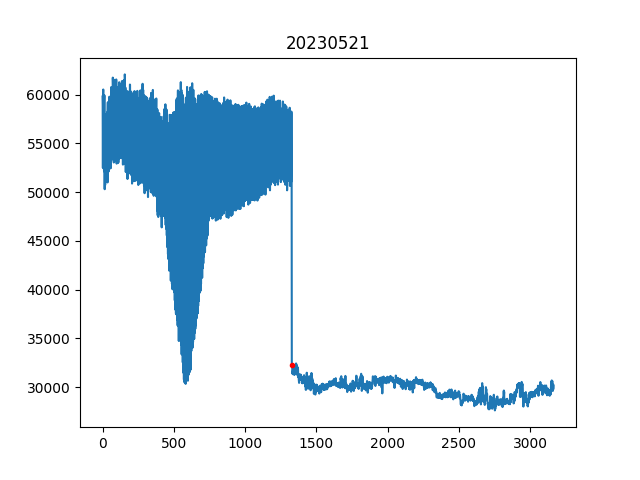

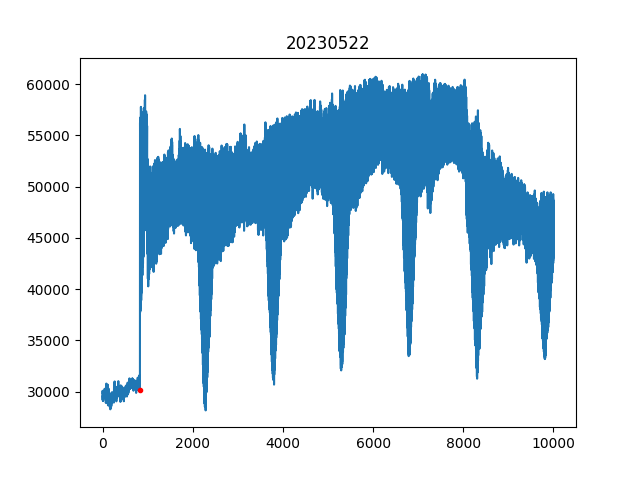

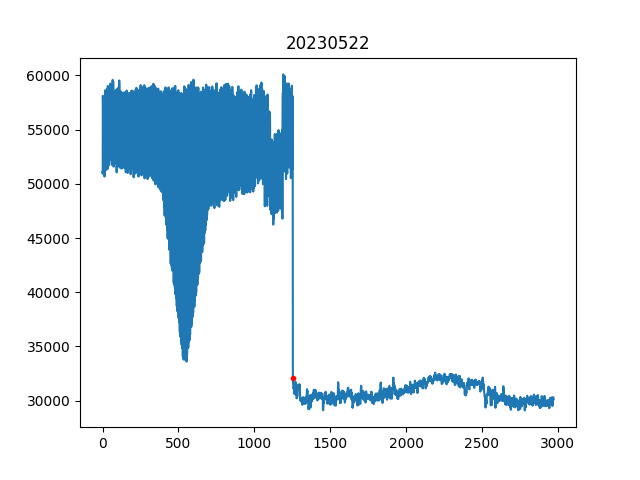

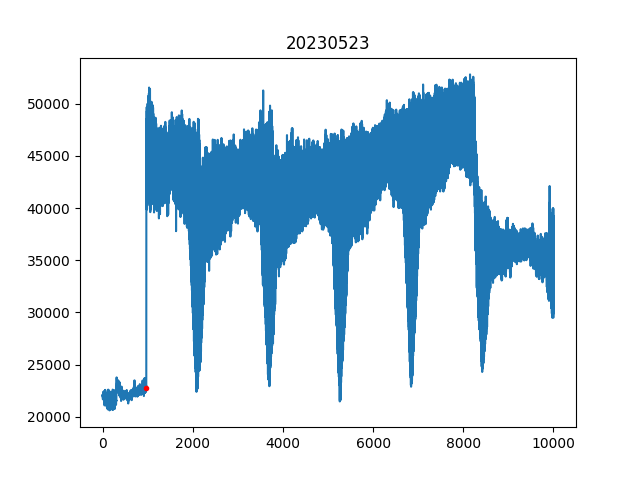

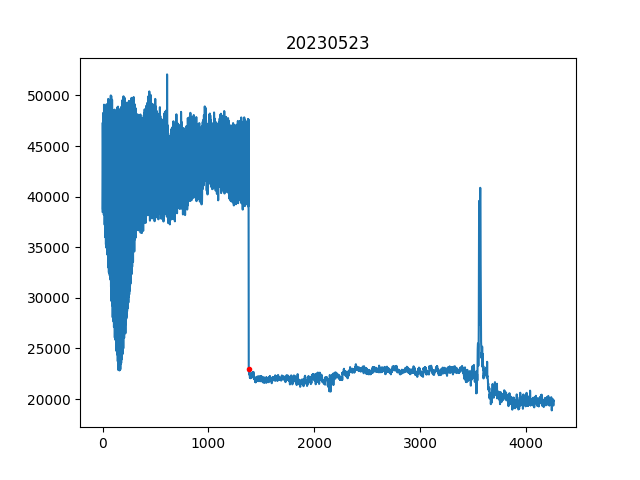

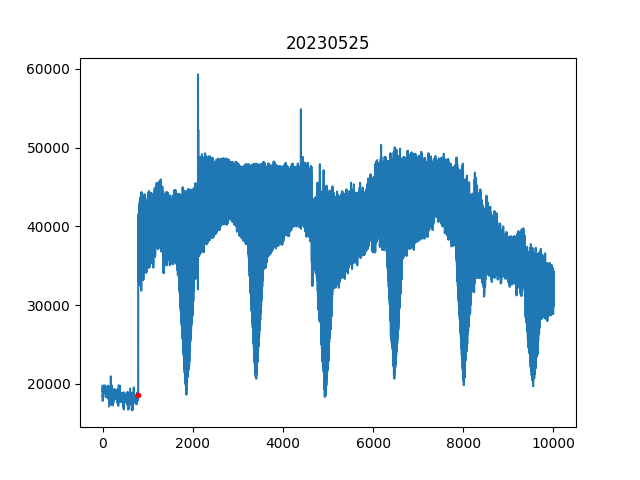

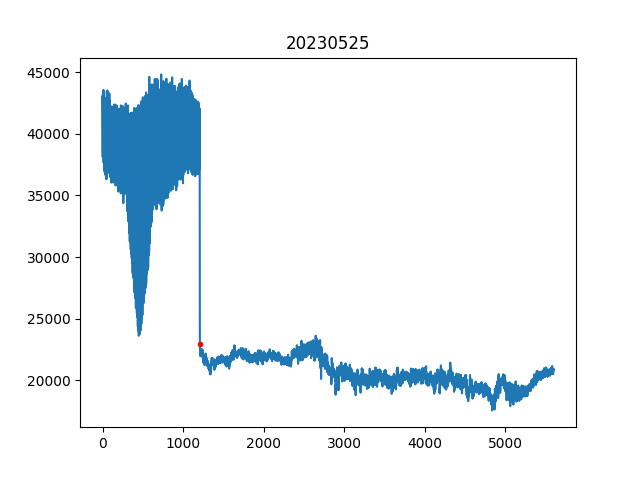

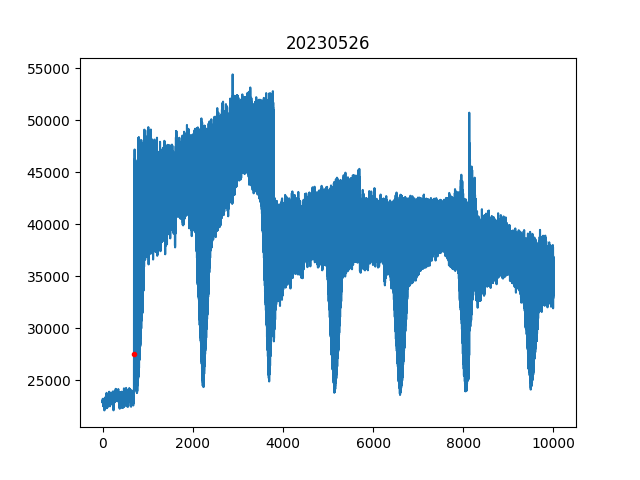

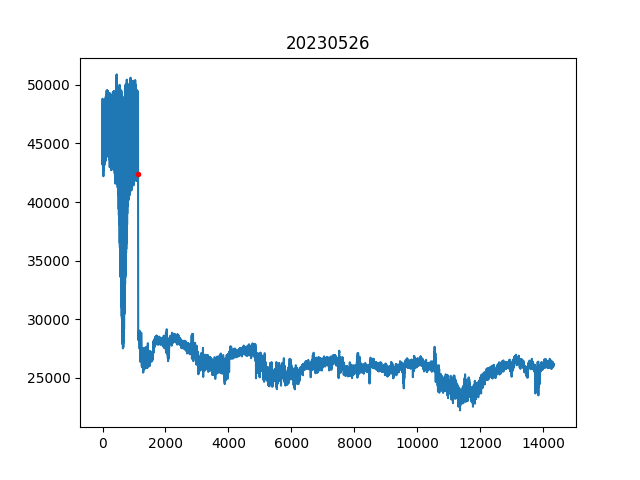

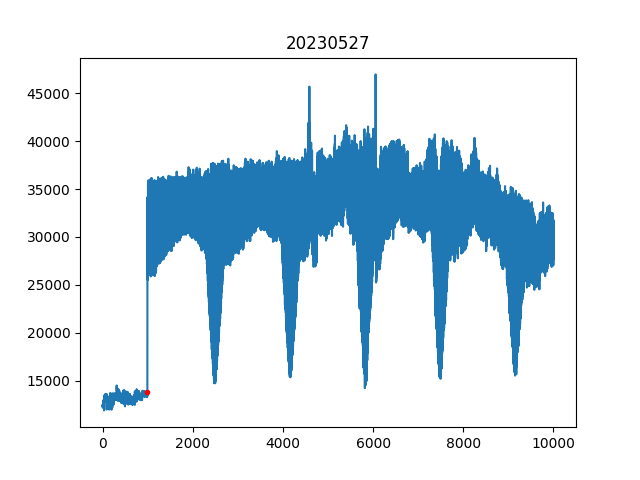

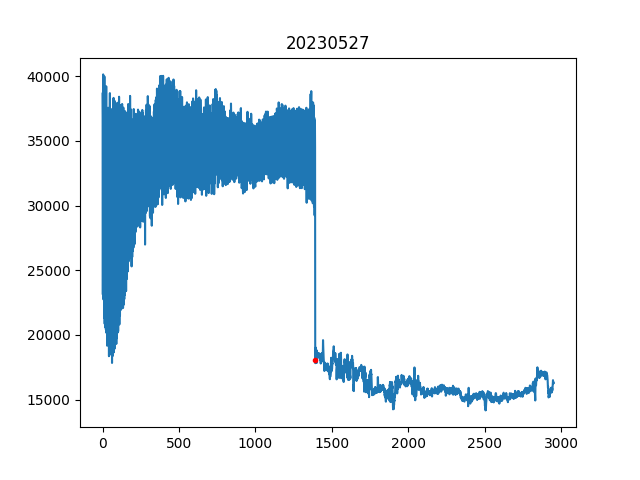

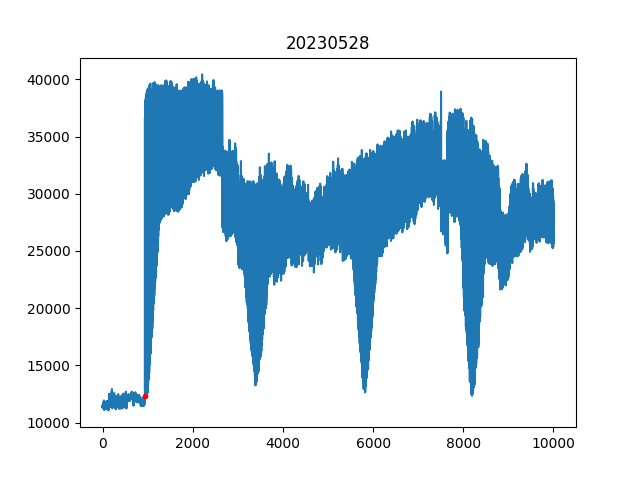

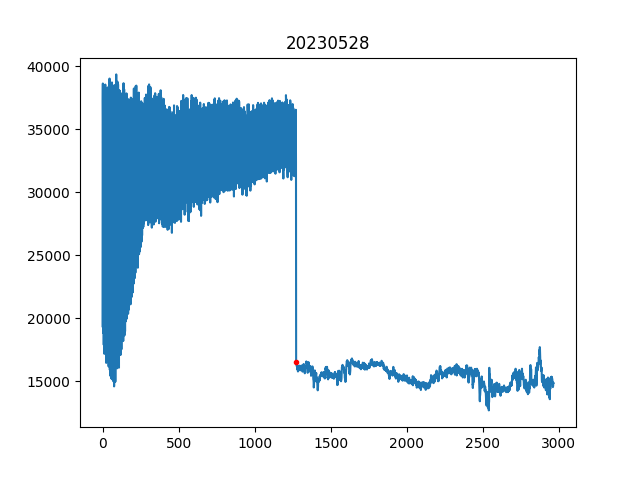

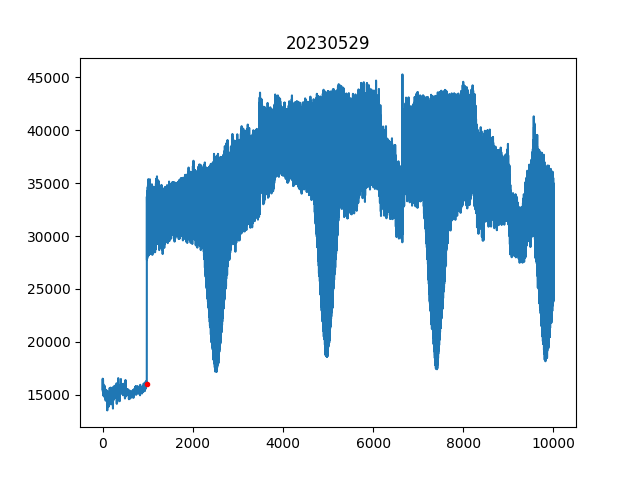

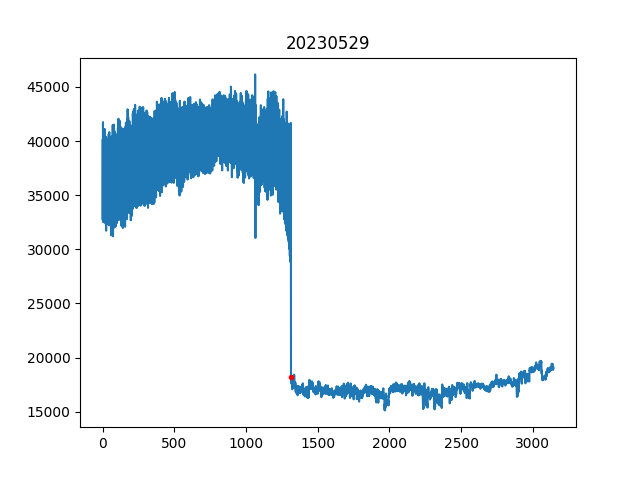

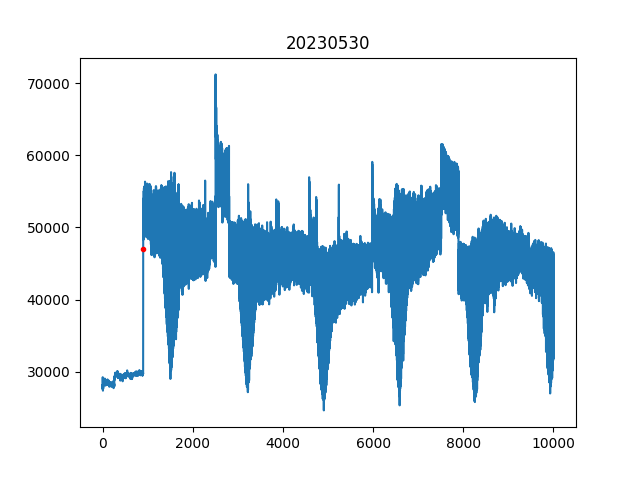

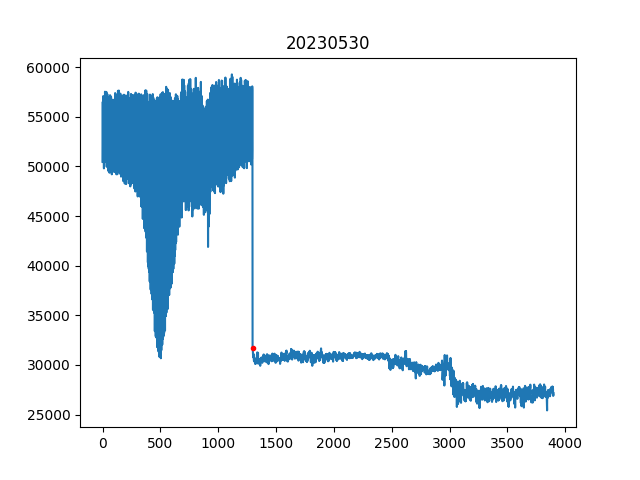

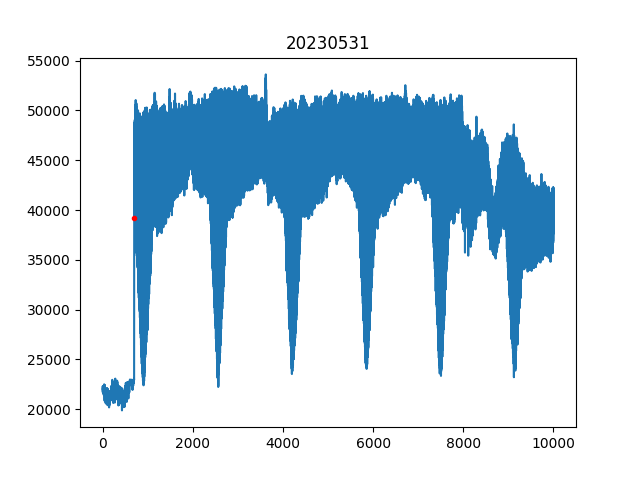

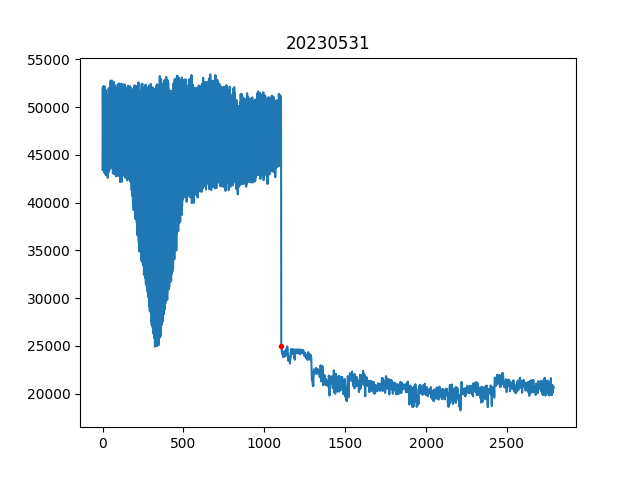

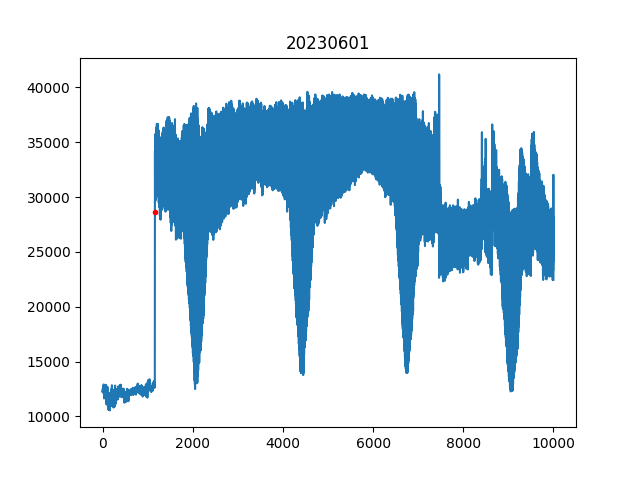

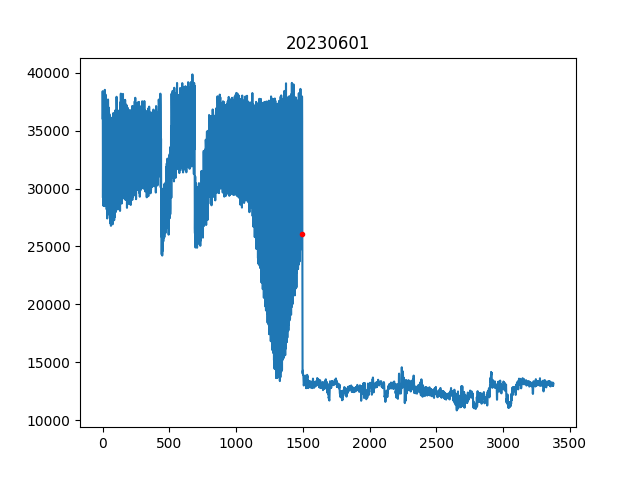

In [21]:
for date in elts.keys():

    try:
        idx_fastForward = elts[date]['idx_fastForward']
        fps = elts[date]['fps']
        trace_start = elts[date]['trace_start'].clone()
        trace_end = elts[date]['trace_end'].clone()
        idx_start = elts[date]['idx_start']
        idx_end = elts[date]['idx_end']
    
        duration_start_end = (idx_end - idx_start) / fps
    
        print(date, duration_start_end/60)
        
        %matplotlib widget
        plt.figure()
        plt.plot(trace_start)
        plt.plot(idx_start, trace_start[idx_start], 'r.')
    #     plt.plot(vqt(trace_start)[0][0][0])
        plt.title(date)
        
        plt.figure()
        plt.plot(trace_end)
        plt.plot(idx_end - idx_fastForward, trace_end[idx_end - idx_fastForward], 'r.')
    #     plt.plot(vqt(trace_end)[0][0][0])
        plt.title(date)

    except:
        None

In [24]:
## mouse_0322N
# None bad

idx_start_end_manuallyCorrected = {}

In [25]:
# # ## mouse_0322R
# # 20230419 end: 1969
# # 20230429 end: 1636

# idx_start_end_manuallyCorrected = {
#     '20230419': {'end': 1969 + elts['20230419']['idx_fastForward']},
#     '20230429': {'end': 1636 + elts['20230429']['idx_fastForward']},
# }

In [26]:
# ## mouse_0403L
# 710 start: 781
# 720 start: 686
# 724 end: 1269 + 431880
# 727 end: 1466 + 575880
# 728 start: 913
# 806 end: 1135 + 575880

# idx_start_end_manuallyCorrected = {
#     '20230710': {'start': 781},
#     '20230720': {'start': 686},
#     '20230724': {'end': 1269 + 431880},
#     '20230727': {'end': 1466 + 575880},
#     '20230728': {'start': 913},
#     '20230806': {'end': 1135 + 575880},
# }

In [27]:
for date in idx_start_end_manuallyCorrected.keys():
    if 'start' in idx_start_end_manuallyCorrected[date]:
        elts2[date]['idx_start'] = idx_start_end_manuallyCorrected[date]['start']
    if 'end' in idx_start_end_manuallyCorrected[date]:
        elts2[date]['idx_end'] = idx_start_end_manuallyCorrected[date]['end']

In [30]:
dir_save = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/traces'
[bnpm.file_helpers.pickle_save(obj=elts2[date], filepath=str(Path(dir_save) / date / 'idx_eye_laser_manuallyCorrected.pkl'), mkdir=True) for date in elts2.keys()];

In [29]:
for date in elts2.keys():

    try:
        idx_fastForward = elts2[date]['idx_fastForward']
        fps = elts2[date]['fps']
        trace_start = elts2[date]['trace_start'].clone()
        trace_end = elts2[date]['trace_end'].clone()
        idx_start = elts2[date]['idx_start']
        idx_end = elts2[date]['idx_end']
    
        duration_start_end = (idx_end - idx_start) / fps
    
        print(date, duration_start_end/60)
        
    #     %matplotlib widget
    #     plt.figure()
    #     plt.plot(trace_start)
    #     plt.plot(idx_start, trace_start[idx_start], 'r.')
    # #     plt.plot(vqt(trace_start)[0][0][0])
    #     plt.title(date)
        
    #     plt.figure()
    #     plt.plot(trace_end)
    #     plt.plot(idx_end - idx_fastForward, trace_end[idx_end - idx_fastForward], 'r.')
    # #     plt.plot(vqt(trace_end)[0][0][0])
    #     plt.title(date)

    except:
        None

20230419 60.05375
20230420 60.053888888888885
20230424 60.04222222222222
20230425 60.03638888888889
20230426 60.04486111111111
20230427 60.03736111111111
20230428 60.03736111111111
20230429 60.03944444444445
20230430 60.034444444444446
20230501 60.041805555555555
20230502 60.03486111111111
20230503 60.04361111111111
20230504 60.03638888888889
20230505 60.04361111111111
20230506 60.031388888888884
20230508 60.03305555555555
20230509 59.98930555555555
20230511 60.04152777777778
20230512 60.034444444444446
20230513 60.04041666666667
20230514 60.03055555555556
20230515 59.25138888888889
20230516 60.03416666666667
20230517 60.03347222222222
20230518 60.044583333333335
20230519 60.0375
20230520 60.03208333333334
20230521 60.03069444444444
20230522 60.034305555555555
20230523 60.03125
20230524 60.03097222222222
20230525 60.03333333333333
20230526 60.03625
20230527 60.03055555555556
20230530 60.02902777777778
20230531 60.02597222222222
